In [233]:
import numpy as np
import math
from scipy.stats import expon
from scipy.stats import uniform
from scipy.stats import chi2
import matplotlib.pyplot as plt
from scipy.stats import ksone #for Kolmogorov-Smirnov test
from scipy.stats import kstest #for checking Kolmogorov-Smirnov test

In [228]:
def gen_expon_values(n, lambd):
    vals = np.random.exponential(scale=1.0/lambd, size=n)
#     vals = expon.rvs(scale = 1.0/lambd, size = n)
    return vals

def make_hist(X, name, n):
    plt.figure(figsize=(4,2.5))
    plt.hist(X, 30, density = True)
    plt.title(f"{name}: {n} спостережень")
    plt.show()
    
def F_expon(u, lambd):
    return 1 - np.exp(- lambd * u)

def F_unif(u):
    if u>=1:
        return 1
    elif u<0:
        return 0
    else:
        return u
#     return uniform.cdf(u, loc=0, scale=1)

In [128]:
gamma = 0.05 #рівень значимості
n = [1000, 10000, 100000]

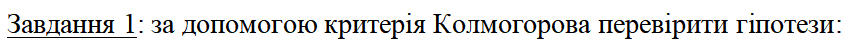
https://www.geeksforgeeks.org/ml-kolmogorov-smirnov-test/<br>
https://mipt-stats.gitlab.io/files/applied_stats_19/lectures/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B8%20%D1%81%D0%BE%D0%B3%D0%BB%D0%B0%D1%81%D0%B8%D1%8F%20%D0%B2%20scipy.pdf

In [225]:
def checker_expon(X, lambd_teor, gamma):
    x = kstest(X, expon(scale=1.0/lambd_teor).cdf)
#     print(x)
    if x.pvalue < gamma:
#         print("Ho REJECTED")
        return 'rejected'
    else:
#         print("Ho ACCEPTED")
        return 'accepted'

def checker_unif(Y, gamma):
    res = kstest(Y, 'uniform')
#     print("res=", res)
    if res.pvalue < gamma:
        return 'not'
    else:
        return 'is'

In [476]:
def Dn(X, n, param, distribution):
    X_ord = np.sort(X) #order statistics
    maximum = float('-inf')
    if distribution == 'expon':
        for k in range(n):
            F_k = F_expon(X_ord[k], param)
            a = F_k - (k-1)/n
            b = k/n - F_k
            m = max(a,b)
            if m > maximum:
                maximum = m
        
    elif distribution == 'unif':
        for k in range(n):
            F_k = F_unif(X_ord[k])
            a = F_k - (k-1)/n
            b = k/n - F_k
            m = max(a,b)
            if m > maximum:
                maximum = m
    
    return maximum


def kolmogorov_test(X, n, param, gamma, distribution):
    res = None
    make_hist(X, 'X', n)
    Z_gamma = ksone.ppf(1-gamma/2, n)
    print("Z_gamma =", Z_gamma)
    D = Dn(X, n, param, distribution)
    print("D=", D)
#     if math.sqrt(n) * D < Z_gamma:
    if D < Z_gamma:
        print("Ho ACCEPTED")
        res = 'accepted'
    else:
        print("Ho REJECTED")
        res = 'rejected'
    c = checker_expon(X, lambd_teor, gamma)
    print(f"validation: {c == res}")
        
def check_Y_ks(X, n, gamma): #перевіряємо Y на рівномірність
    print("\nChecking Y")
    r = None
    Y = F_expon(X, lambd)
    make_hist(Y, 'Y', n)
    
    Z_gamma = ksone.ppf(1-gamma/2, n)
    D = Dn(Y, n, [0,1], 'unif')
#     print("D=", D)
    if D < Z_gamma:
        print("Y is uniform")
        r = 'is'
    else:
        print("Y NOT uniform")
        r = 'not'
        
    '''validation'''    
    v = checker_unif(Y, gamma)
    print(f'validation: {v==r}')

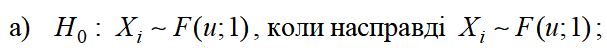

n= 1000


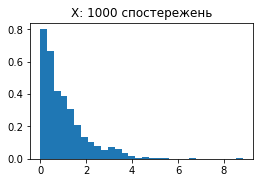

Z_gamma = 0.04277658868221006
D= 0.03844836655371886
Ho ACCEPTED
validation: True

Checking Y


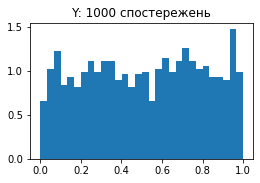

Y is uniform
validation: True
-------------------------
n= 10000


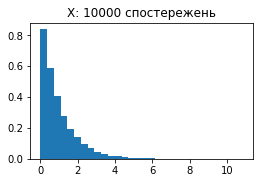

Z_gamma = 0.013564231504551336
D= 0.008605324724178062
Ho ACCEPTED
validation: True

Checking Y


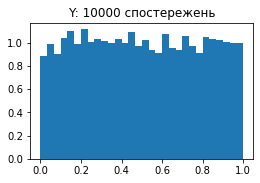

Y is uniform
validation: True
-------------------------
n= 100000


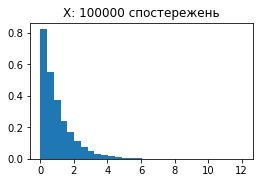

Z_gamma = 0.0042930237127826185
D= 0.0017869056221027912
Ho ACCEPTED
validation: True

Checking Y


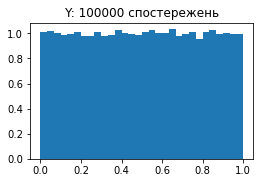

Y is uniform
validation: True
-------------------------


In [231]:
lambd_real = 1 #яка насправді
lambd_teor = 1 #яку ми перевіряємо

for n_i in n:
    print("n=", n_i)
    X = gen_expon_values(n_i, lambd_real)
    kolmogorov_test(X, n_i, lambd_teor, gamma,  'expon')
    check_Y_ks(X, n_i, gamma)
    print("-------------------------")

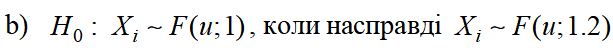

n= 1000


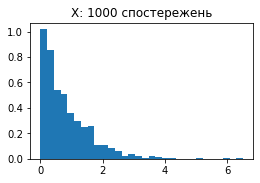

Z_gamma = 0.04277658868221006
D= 0.06519348477298403
Ho REJECTED
validation: True

Checking Y


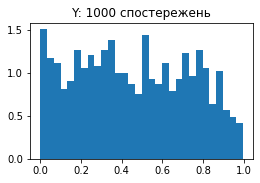

Y NOT uniform
validation: True
-------------------------
n= 10000


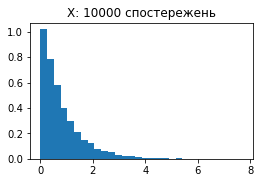

Z_gamma = 0.013564231504551336
D= 0.07867499893956531
Ho REJECTED
validation: True

Checking Y


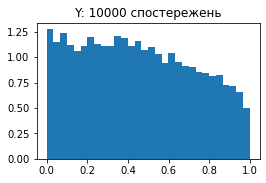

Y NOT uniform
validation: True
-------------------------
n= 100000


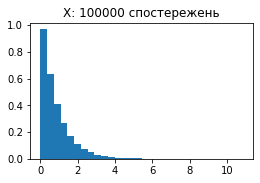

Z_gamma = 0.0042930237127826185
D= 0.06702164291811175
Ho REJECTED
validation: True

Checking Y


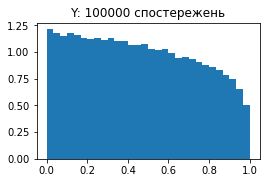

Y NOT uniform
validation: True
-------------------------


In [232]:
lambd_real = 1.2 #яка насправді
lambd_teor = 1 #яку ми перевіряємо

for n_i in n:
    print("n=", n_i)
    X = gen_expon_values(n_i, lambd_real)
    kolmogorov_test(X, n_i, lambd_teor, gamma,  'expon')
    check_Y(X, n_i, gamma)
    print("-------------------------")

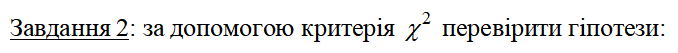

In [541]:
def get_equal_intervals(r, h):
    ai = [0]
    s = 0
    for j in range(r):
        ai.append(s+h)
        s = s+h
    return ai

def get_v(X, xmax, r, h):
    v = [0 for i in range(r)]
    for x_i in X:
        if x_i == xmax:
            v[-1]+=1
        else:
            ind = int(x_i/h)
            v[ind]+=1
    return v

def get_p(r, lambd, breakpoints, distribution):
    if distribution == 'expon':
        funcs = [F_expon(point, lambd) for point in breakpoints]
        p = [(funcs[i] - funcs[i-1]) for i in range(1, r+1)]
    elif distribution == 'unif':
        p = [1/r for i in range(r)]    
    return p

def get_delta(n, r, v, p):
    s = 0
    for i in range(r):
        s += (v[i] - n*p[i])**2 /p[i]
    res = s/n 
    return res

def chi2_pearson_test(X, n, gamma, lambd_teor, distribution):
    r = int(0.03 * n) # кількість інтервалів
    res = None
#     r = int(0.3 * n) #для дуже маленьких n
    Z_gamma = chi2.ppf(1-gamma, df = r-1)
    print("Z_gamma=", Z_gamma)
    xmax = np.max(X)
    h = xmax / r # ширина інтервалу
    print("r=", r, "h=", h)
    breakpoints = get_equal_intervals(r, h)
    v = get_v(X, xmax, r, h) #вектор частот
#     print("v=", v)
    p = get_p(r, lambd, breakpoints, distribution)
#     print("p=", p)
#     print("n*p=", [n*p_i for p_i in p])
    delta = get_delta(n, r, v, p)
    print('delta=', delta)
    if delta < Z_gamma:
        print("Ho ACCEPTED")
        res = 'accepted'
    else:
        print("Ho REJECTED")
        res = 'rejected'
        
def check_Y_chi2(X, n, gamma, lambd_teor): #перевіряємо Y на рівномірність
    print("\nChecking Y")
    r = None
    Y = F_expon(X, lambd)
    make_hist(Y, 'Y', n)
    chi2_pearson_test(Y, n, gamma, lambd_teor, 'unif')

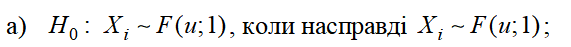

n= 1000


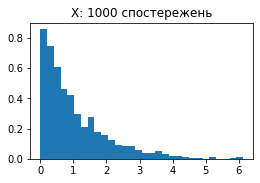

Z_gamma= 42.55696780429269
r= 30 h= 0.20448974830552047
delta= 23.31739404177649
Ho ACCEPTED

Checking Y


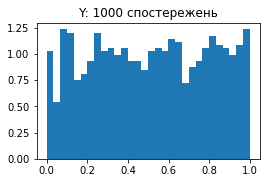

Z_gamma= 42.55696780429269
r= 30 h= 0.03326112028696939
delta= 24.139999999999997
Ho ACCEPTED
-------------------------
n= 10000


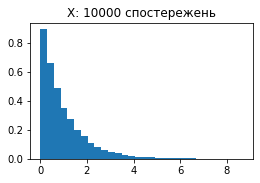

Z_gamma= 340.3278503488595
r= 300 h= 0.029040887841222426
delta= 320.4131579095264
Ho ACCEPTED

Checking Y


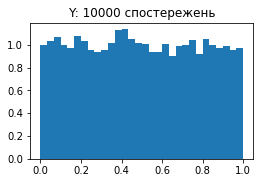

Z_gamma= 340.3278503488595
r= 300 h= 0.003332784817026072
delta= 292.46000000000066
Ho ACCEPTED
-------------------------
n= 100000


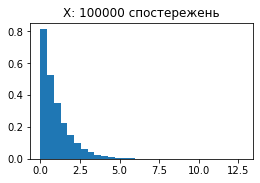

Z_gamma= 3127.515431571307
r= 3000 h= 0.004266700878190859
delta= 3365.6741706231414
Ho REJECTED

Checking Y


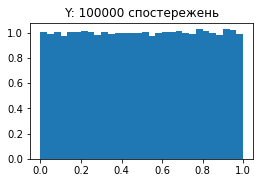

Z_gamma= 3127.515431571307
r= 3000 h= 0.0003333324131702547
delta= 2979.2600000000466
Ho ACCEPTED
-------------------------


In [544]:
lambd_real = 1 #яка насправді
lambd_teor = 1 #яку ми перевіряємо

for n_i in n:
    print("n=", n_i)
    X = gen_expon_values(n_i, lambd_real)
    make_hist(X, 'X', n_i)
    chi2_pearson_test(X, n_i, gamma, lambd_teor, 'expon')
    check_Y_chi2(X, n_i, gamma, lambd_teor)
    print("-------------------------")

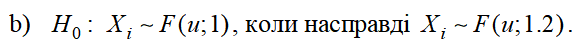

n= 1000


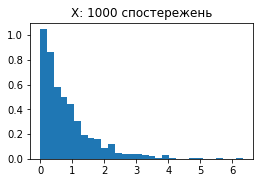

Z_gamma= 42.55696780429269
r= 30 h= 0.21139171776540952
delta= 45.17013293064643
Ho REJECTED

Checking Y


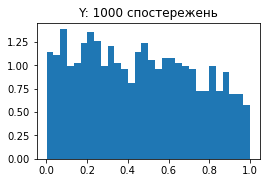

Z_gamma= 42.55696780429269
r= 30 h= 0.033274626176398175
delta= 42.199999999999996
Ho ACCEPTED
-------------------------
n= 10000


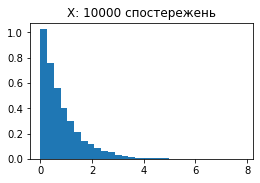

Z_gamma= 340.3278503488595
r= 300 h= 0.026159871768196633
delta= 477.11163271210455
Ho REJECTED

Checking Y


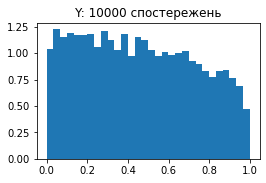

Z_gamma= 340.3278503488595
r= 300 h= 0.0033320315090796717
delta= 578.720000000001
Ho REJECTED
-------------------------
n= 100000


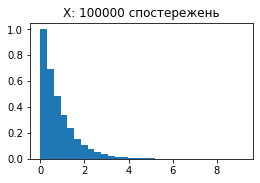

Z_gamma= 3127.515431571307
r= 3000 h= 0.0030675364394401146
delta= 4471.6882153826655
Ho REJECTED

Checking Y


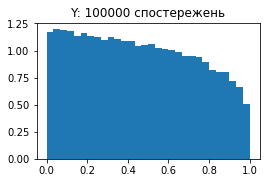

Z_gamma= 3127.515431571307
r= 3000 h= 0.0003332997412994862
delta= 5832.859999999819
Ho REJECTED
-------------------------


In [546]:
lambd_real = 1.2 #яка насправді
lambd_teor = 1 #яку ми перевіряємо

for n_i in n:
    print("n=", n_i)
    X = gen_expon_values(n_i, lambd_real)
    make_hist(X, 'X', n_i)
    chi2_pearson_test(X, n_i, gamma, lambd_teor, 'expon')
    check_Y_chi2(X, n_i, gamma, lambd_teor)
    print("-------------------------")

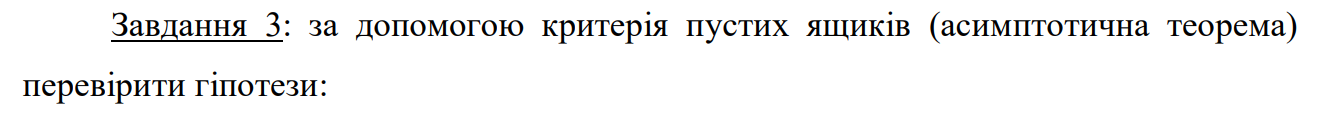

In [ ]:
# def Dn(X, n, lambd_teor):
#     X_ord = np.sort(X) #order statistics
#     maximum = float('-inf')
#     for k in range(n):
#         F_k = F(X_ord[k], lambd_teor)
#         a = F_k - (k-1)/n
#         b = k/n - F_k
#         m = max(a,b)
#         if m > maximum:
#             maximum = m
#     return maximum

# def kolmogorov_test(X, n, lambd_teor, gamma):
#     Z_gamma = ksone.ppf(1-gamma/2, n)
#     print("Z_gamma =", Z_gamma)
#     D = Dn(X, n, lambd_teor)
#     print("D=", D)
#     print("math.sqrt(n) * D=", math.sqrt(n) * D)
# #     if math.sqrt(n) * D < Z_gamma:
#     if D < Z_gamma:
#         print("Ho ACCEPTED")
#     else:
#         print("Ho REJECTED")


# def getintervals(r, lambd):
#     ai = [math.log(1-i/r)/(-lambd) for i in range(1,r)]
#     ai.insert(0, 0)
#     ai.append(float('inf'))
#     return ai

# def get_p1(X, n, r, lambd, intervals):
#     probs = [1 - math.exp(-lambd/(interv[1])) for interv in intervals]
#     print(probs)
#     probs1 = [probs[i]-probs[i-1] for i in range(1, r)]
#     probs1.insert(0, probs[0])
#     print("sump=", np.sum(probs1))
# #     expected_freqs = [n * (probs[i]) for i in range(0, r)]
# # #     expected_freqs.insert(0, n * probs[0])
#     return probs1